In [41]:
import sys, os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [42]:
try:
    sys.path.append('/home/piotr/CodeProjects/MhcEvo2000/PyScripts/')
except:
    sys.path.append('/home/piotr/CodeProjects/mhcevolution/PyScripts/')
import sex_selection_on_MHC_numb as ssmn

In [43]:
cd /home/piotr/Documents/MHC_UAM/sexSelect/

/home/piotr/Documents/MHC_UAM/sexSelect


In [44]:
df_1 = pd.read_csv("Integr_1e5.csv")
df_5 = pd.read_csv("Integr_5e5.csv")

In [45]:
main_paper = ['Random', 'MinShared', 'PropShared']
df_1s = df_1.loc[df_1['SEXSELECT'].isin(main_paper)]
df_5s = df_5.loc[df_5['SEXSELECT'].isin(main_paper)]

In [46]:
print(df_1.dtypes)
print(np.unique(df_1['SEXSELECT']))

patho_spp       int64
SEXSELECT      object
meanAllel     float64
stdAllel      float64
slope         float64
indvMean      float64
indvSTD       float64
meanFitt      float64
meanCvFitt    float64
meanPatho     float64
stdPato       float64
dtype: object
['MaxDiff' 'MinShared' 'MinSharedUnc' 'PropShared' 'PropSharedUnc'
 'Random']


In [47]:
ax_label = 26
T_label = 30
TicksFS = 24

In [48]:
myPallt = ["#6ACC65", "#4878CF", "#D65F5F", "#B47CC7", "#C4AD66", "#77BEDB"]
palDct = {"4": myPallt[0], "8": myPallt[1], "16": myPallt[2]}

def plotBox(what, df, patho_mut, ordr, ymaxx=None, legd=True, mPlt=myPallt):
    """Fast plot of what we want"""
    ax = sns.boxplot(x="SEXSELECT", y=what, hue="patho_spp", data=df, order=ordr, palette=mPlt)
    ax.legend_.remove()
    if legd:
        plt.legend(title="Patho. spp.",title_fontsize=TicksFS-4, fontsize=TicksFS-2, loc=2, edgecolor='white')
    #plt.xlabel("sexual selection mode",fontsize=ax_label)
    plt.xticks(fontsize=TicksFS)
    plt.yticks(fontsize=TicksFS)
    plt.xlabel(None)
    plt.ylabel(None)
    plt.grid(True, axis="y")
    if ymaxx:
        plt.ylim((0, ymaxx))
    #plt.tight_layout()
    #plt.savefig(str(patho_mut) + "." + what + ".png")
    #plt.show()

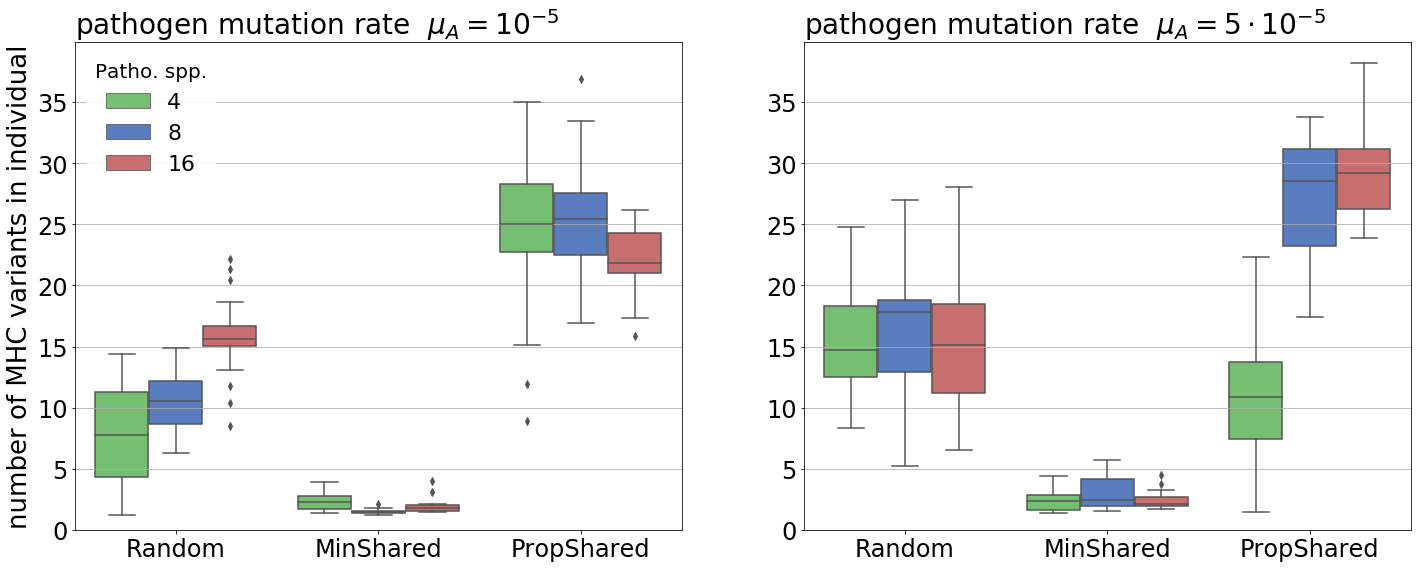

In [49]:
plt.figure(figsize=(20,8))

patho_mut = 0.00001
plt.subplot(121)
what = "indvMean"
plotBox(what, df_1s, patho_mut, main_paper, 39.9, True)
plt.title("pathogen mutation rate  $\mu_{A} = 10^{-5}$", loc='left', fontsize=ax_label+2)
plt.ylabel("number of MHC variants in individual", fontsize=ax_label)

patho_mut = 0.00005
plt.subplot(122)
what = "indvMean"
plotBox(what, df_5s, patho_mut, main_paper, 39.9, False)
plt.title("pathogen mutation rate  $\mu_{A} = 5 \cdot 10^{-5}$", loc='left', fontsize=ax_label+2)
#plt.ylabel("            number of MHC variants in individual", fontsize=ax_label, horizontalalignment='left')

plt.tight_layout()
plt.subplots_adjust(hspace=0.25, wspace=0.2)
plt.savefig("Fig1.png")
plt.show()

In [50]:
def justPlotDeviantFromMeanFather(ww, deltas, bSize, clr, xl=(0, 70), yl=(-20, 14)):
    """Does the same as `plotDeviantFromMeanFather()` only it does not
    calculate the stats on it self."""
    FS = 26
    bSize = np.sqrt(bSize)  # Create marker list
    plt.scatter(ww, deltas, s=bSize, color=clr)
    ll = np.linspace(xl[0], xl[1], 30)
    plt.plot(ll, np.zeros(len(ll)), 'k-', lw=3)
    plt.grid(axis='y')
    #plt.xlabel("Number of MHC types in 'mothers'", fontsize=FS)
    #plt.ylabel("Average deviation of 'fathers' MHC type\nnumber from" +
    #           " pre-mating population", fontsize=FS)
    plt.xlim(xl)
    plt.ylim(yl)
    plt.xticks(size=FS-2)
    plt.yticks(size=FS-2)
    plt.tight_layout()

#### The line below decides what number of pathogen species is interesting. Choice is: **4, 8, 16**

In [51]:
spp = str(16)

In [60]:
minShr = ssmn.avgDatOut(np.load("./minSharedAlpha/minSharedAlpha_1e5/sexSelectStrgt_" + spp + "_minShr_1e5.npy", allow_pickle=True))
minShr5e5 = ssmn.avgDatOut(np.load("./minSharedAlpha/minSharedAlpha_5e5/sexSelectStrgt_" + spp + "_minShr_5e5.npy", allow_pickle=True))
optimAlpha = ssmn.avgDatOut(np.load("./optimAlpha/optimAlpha_1e5/sexSelectStrgt_" + spp + "_optAlpha_1e5.npy", allow_pickle=True))
optimAlpha5e5 = ssmn.avgDatOut(np.load("./optimAlpha/optimAlpha_5e5/sexSelectStrgt_" + spp + "_optAlpha_5e5.npy", allow_pickle=True))
optNoAlpha = ssmn.avgDatOut(np.load("./optimNoAlpha/optimNoAlpha_1e1/sexSelectStrgt_" + spp + "_optNoAlpha_1e5.npy", allow_pickle=True))
optNoAlpha5e5 = ssmn.avgDatOut(np.load("./optimNoAlpha/optimNoAlpha_5e5/sexSelectStrgt_" + spp + "_optNoAlpha_5e5.npy", allow_pickle=True))
maxDiffer = ssmn.avgDatOut(np.load("./maxDiffAlpha/maxDiff_1e5/sexSelectStrgt_maxDiffAlph_" + spp + "spp_0.02_1e5.npy", allow_pickle=True))
maxDiffer5e5 = ssmn.avgDatOut(np.load("./maxDiffAlpha/maxDiff_5e5/sexSelectStrgt_maxDiffAlph_" + spp + "spp_0.02_5e5.npy", allow_pickle=True))
minShrUnc = ssmn.avgDatOut(np.load("./minShared/minShared_1e5/sexSelectStrgt_" + spp + "_minShr_1e5.npy", allow_pickle=True))
minShrUnc5e5 = ssmn.avgDatOut(np.load("./minShared/minShared_5e5/sexSelectStrgt_" + spp + "_minShr_5e5.npy", allow_pickle=True))

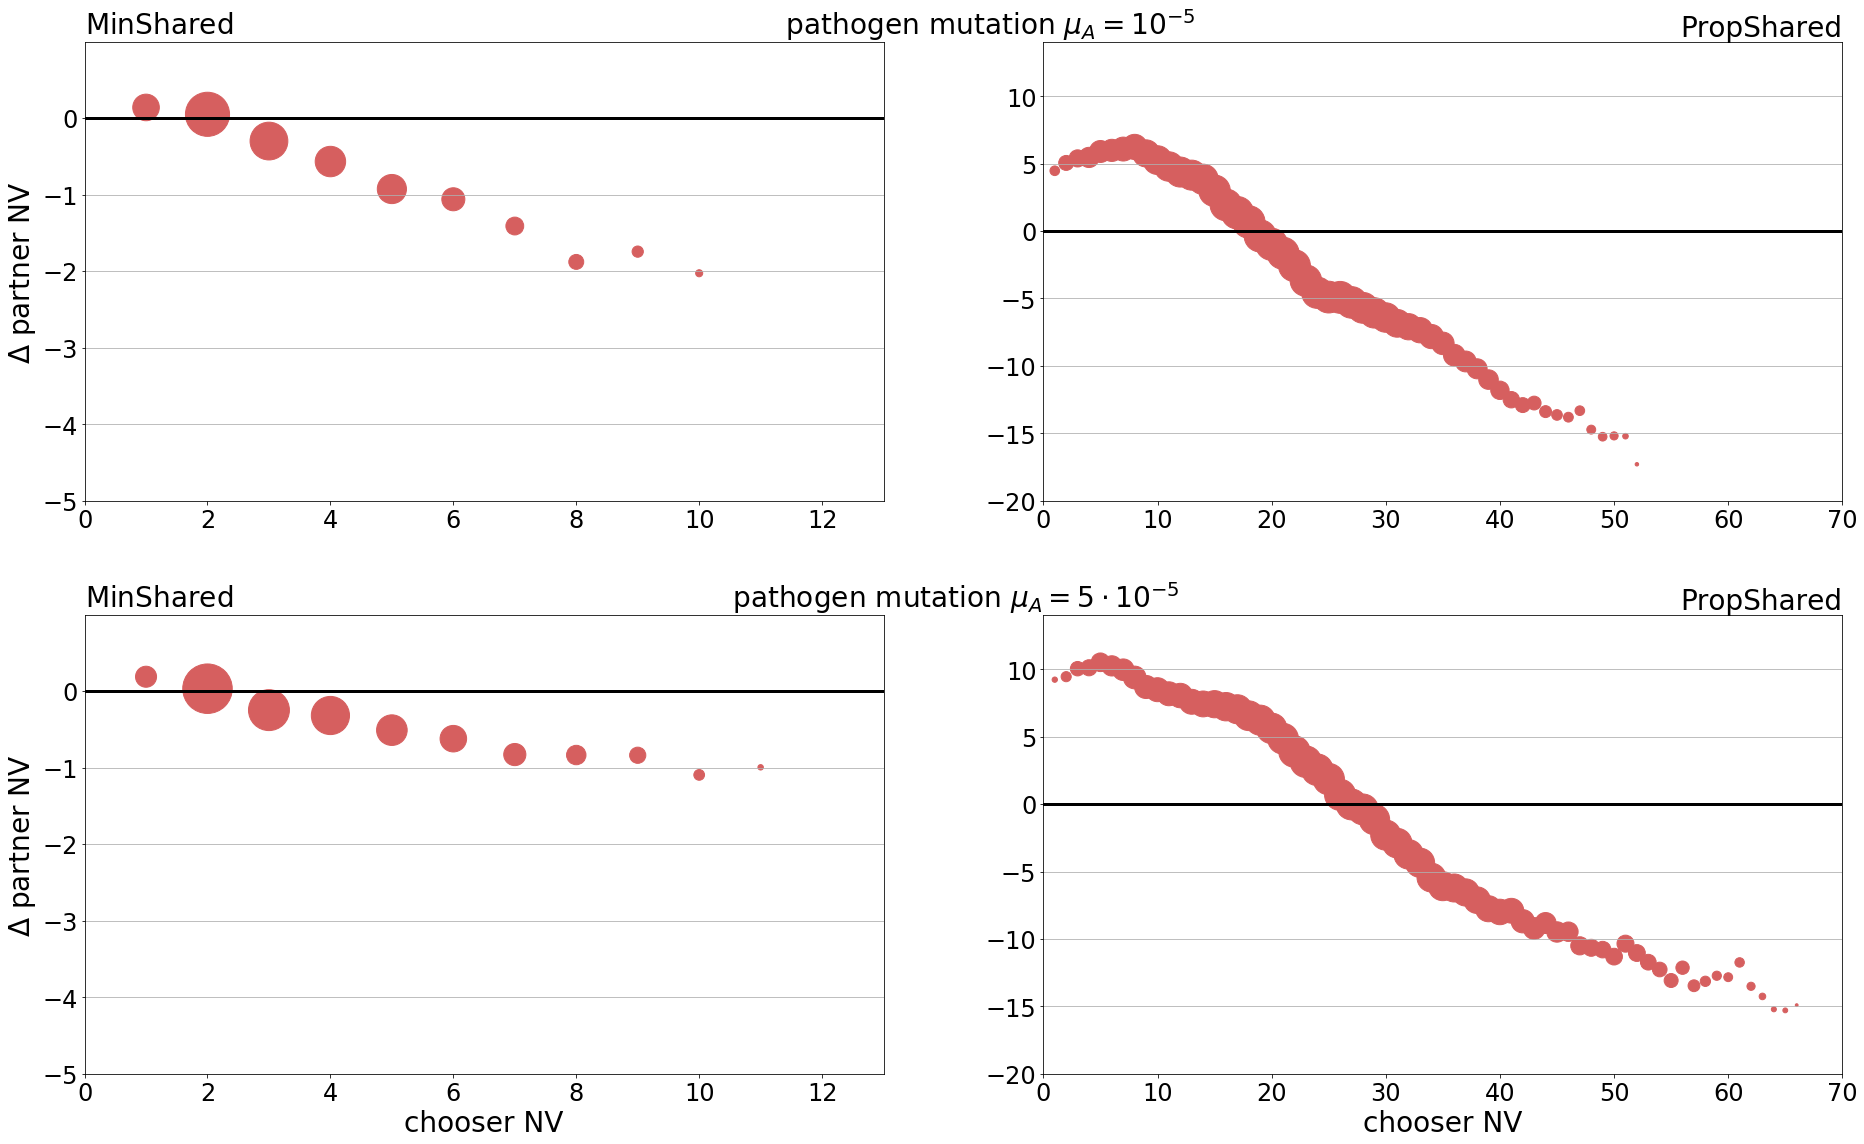

In [53]:
FS = 28
colr = palDct[spp]
plt.figure(figsize=(26,16))
plt.title("Number of pathogen spesies ")
plt.subplot(221)
justPlotDeviantFromMeanFather(minShr[:, 0], minShr[:, 1], minShr[:, 2], colr, (0,13), (-5,0.99))
plt.title("MinShared                                                              pathogen mutation $\mu_{A} = 10^{-5}$", 
          loc='left', fontsize=ax_label+2)
#plt.xlabel("Number of MHC types in 'mothers'", fontsize=FS)
plt.ylabel(r"$\Delta$ partner NV", fontsize=FS, horizontalalignment='center')
plt.subplot(222)
justPlotDeviantFromMeanFather(optimAlpha[:, 0], optimAlpha[:, 1], optimAlpha[:, 2], colr)
plt.title("PropShared", loc='right', fontsize=ax_label+2)
#plt.xlabel("Number of MHC types in 'mothers'", fontsize=FS)
#plt.ylabel(r"$\Delta$ partner NV", fontsize=FS, horizontalalignment='center')
"""
plt.subplot(233)
justPlotDeviantFromMeanFather(optNoAlpha[:, 0], optNoAlpha[:, 1], optNoAlpha[:, 2], colr)
plt.title("optimal selection without constrains", loc='right', fontsize=ax_label+2)
#plt.xlabel("Number of MHC types in 'mothers'", fontsize=FS)
#plt.ylabel("Average deviation of 'fathers' MHC type\nnumber from pre-mating population", fontsize=FS)
"""
plt.subplot(223)
justPlotDeviantFromMeanFather(minShr5e5[:, 0], minShr5e5[:, 1], minShr5e5[:, 2], colr, (0,13), (-5,0.99))
plt.title("MinShared                                                        pathogen mutation $\mu_{A} = 5 \cdot 10^{-5}$",
          loc='left', fontsize=ax_label+2)
plt.xlabel("chooser NV", fontsize=FS)
plt.ylabel(r"$\Delta$ partner NV", fontsize=FS, horizontalalignment='center')
plt.subplot(224)
justPlotDeviantFromMeanFather(optimAlpha5e5[:, 0], optimAlpha5e5[:, 1], optimAlpha5e5[:, 2], colr)
plt.title("PropShared", loc='right', fontsize=ax_label+2)
plt.xlabel("chooser NV", fontsize=FS)
#plt.ylabel("Average deviation of 'fathers' MHC type\nnumber from pre-mating population", fontsize=FS)
"""
plt.subplot(236)
justPlotDeviantFromMeanFather(optNoAlpha5e5[:, 0], optNoAlpha5e5[:, 1], optNoAlpha5e5[:, 2], colr)
plt.title("optimal selection without constrains", loc='right', fontsize=ax_label+2)
plt.xlabel("number of MHC types in 'mothers'", fontsize=FS)
#plt.ylabel("Average deviation of 'fathers' MHC type\nnumber from pre-mating population", fontsize=FS)
"""
plt.tight_layout()
plt.subplots_adjust(hspace=0.25, wspace=0.2)
strr = "SexSelectStrght_" + spp + "_pat_spp.png"
plt.savefig(strr)
plt.show()

In [54]:
maxDiffer_4 = ssmn.avgDatOut(np.load("./maxDiffAlpha/maxDiff_1e5/sexSelectStrgt_maxDiffAlph_" + str(4) + "spp_0.02_1e5.npy", allow_pickle=True))
maxDiffer5e5_4 = ssmn.avgDatOut(np.load("./maxDiffAlpha/maxDiff_5e5/sexSelectStrgt_maxDiffAlph_" + str(4) + "spp_0.02_5e5.npy", allow_pickle=True))
maxDiffer_8 = ssmn.avgDatOut(np.load("./maxDiffAlpha/maxDiff_1e5/sexSelectStrgt_maxDiffAlph_" + str(8) + "spp_0.02_1e5.npy", allow_pickle=True))
maxDiffer5e5_8 = ssmn.avgDatOut(np.load("./maxDiffAlpha/maxDiff_5e5/sexSelectStrgt_maxDiffAlph_" + str(8) + "spp_0.02_5e5.npy", allow_pickle=True))
maxDiffer_16 = ssmn.avgDatOut(np.load("./maxDiffAlpha/maxDiff_1e5/sexSelectStrgt_maxDiffAlph_" + str(16) + "spp_0.02_1e5.npy", allow_pickle=True))
maxDiffer5e5_16 = ssmn.avgDatOut(np.load("./maxDiffAlpha/maxDiff_5e5/sexSelectStrgt_maxDiffAlph_" + str(16) + "spp_0.02_5e5.npy", allow_pickle=True))

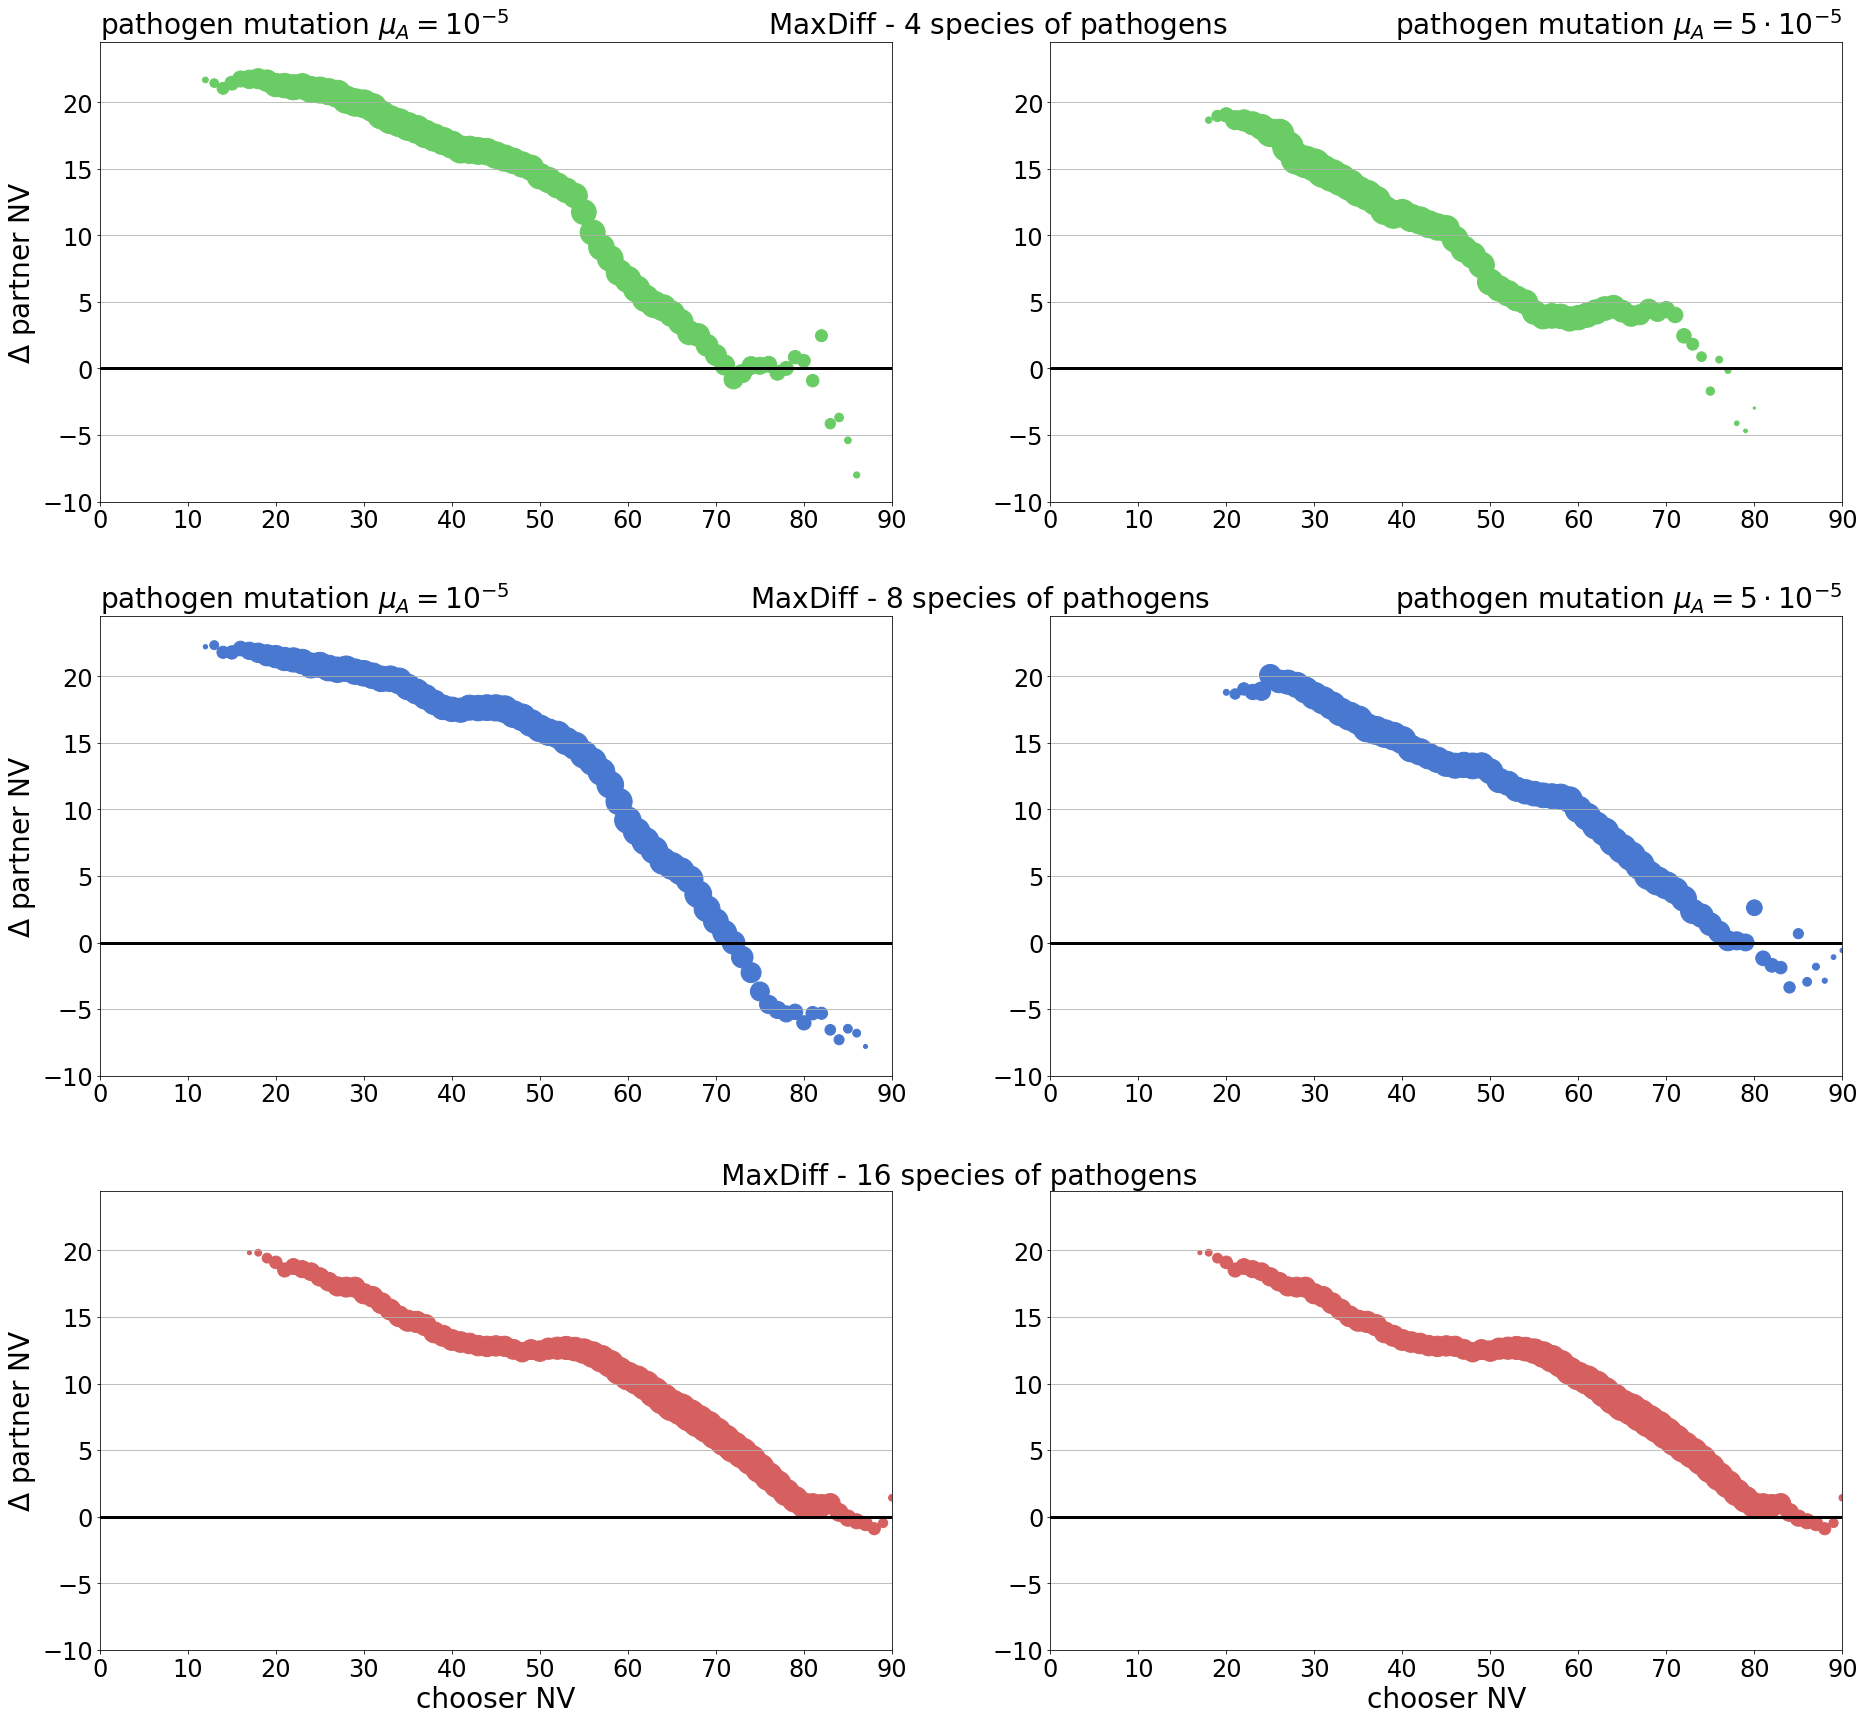

In [55]:
FS = 28
minY = -10
maxY = 24.5
maxX = 90

plt.figure(figsize=(26,24))
plt.title("Number of pathogen spesies ")

plt.subplot(321)
justPlotDeviantFromMeanFather(maxDiffer_4[:, 0], maxDiffer_4[:, 1], maxDiffer_4[:, 2], palDct['4'], (0,maxX), (minY,maxY))
plt.title("pathogen mutation $\mu_{A} = 10^{-5}$                             MaxDiff - 4 species of pathogens", 
          loc='left', fontsize=ax_label+2)
plt.ylabel(r"$\Delta$ partner NV", fontsize=FS, horizontalalignment='center')
plt.subplot(322)
justPlotDeviantFromMeanFather(maxDiffer5e5_4[:, 0], maxDiffer5e5_4[:, 1], maxDiffer5e5_4[:, 2], palDct['4'], (0,maxX), (minY,maxY))
plt.title("pathogen mutation $\mu_{A} = 5 \cdot 10^{-5}$", loc='right', fontsize=ax_label+2)

plt.subplot(323)
justPlotDeviantFromMeanFather(maxDiffer_8[:, 0], maxDiffer_8[:, 1], maxDiffer_8[:, 2], palDct['8'], (0,maxX), (minY,maxY))
plt.title("pathogen mutation $\mu_{A} = 10^{-5}$                           MaxDiff - 8 species of pathogens", 
          loc='left', fontsize=ax_label+2)
plt.ylabel(r"$\Delta$ partner NV", fontsize=FS, horizontalalignment='center')
plt.subplot(324)
justPlotDeviantFromMeanFather(maxDiffer5e5_8[:, 0], maxDiffer5e5_8[:, 1], maxDiffer5e5_8[:, 2], palDct['8'], (0,maxX), (minY,maxY))
plt.title("pathogen mutation $\mu_{A} = 5 \cdot 10^{-5}$", loc='right', fontsize=ax_label+2)

plt.subplot(325)
justPlotDeviantFromMeanFather(maxDiffer5e5_16[:, 0], maxDiffer5e5_16[:, 1], maxDiffer5e5_16[:, 2], palDct['16'], (0,maxX), (minY,maxY))
plt.title("                                                                      MaxDiff - 16 species of pathogens",
          loc='left', fontsize=ax_label+2)
plt.xlabel("chooser NV", fontsize=FS)
plt.ylabel(r"$\Delta$ partner NV", fontsize=FS, horizontalalignment='center')

plt.subplot(326)
justPlotDeviantFromMeanFather(maxDiffer5e5[:, 0], maxDiffer5e5[:, 1], maxDiffer5e5[:, 2], palDct['16'], (0,maxX), (minY,maxY))
#plt.title("MaxDiffer", loc='right', fontsize=ax_label+2)
plt.xlabel("chooser NV", fontsize=FS)
#plt.ylabel("Average deviation of 'fathers' MHC type\nnumber from pre-mating population", fontsize=FS)

plt.tight_layout()
plt.subplots_adjust(hspace=0.25, wspace=0.2)
strr = "Max_Differ_sex_selection.png"
plt.savefig(strr)
plt.show()

In [56]:
hdr = "SEXSELECT T_mut patho_spp MHC_in_mother father_deviant number_of_cases"
np.savetxt("sexSelectStrgt_" + spp + "_minShr_1e5.dat", minShr, 
           fmt='MinShared {:.5f} {} %d %.7f %d'.format(1e-5, spp), header=hdr)
np.savetxt("sexSelectStrgt_" + spp + "_minShr_5e5.dat", minShr5e5, 
           fmt='MinShared {:.5f} {} %d %.7f %d'.format(5e-5, spp), header=hdr)
np.savetxt("sexSelectStrgt_" + spp + "_propShared_1e5.dat", optimAlpha, 
           fmt='PropShared {:.5f} {} %d %.7f %d'.format(1e-5, spp), header=hdr) 
np.savetxt("sexSelectStrgt_" + spp + "_propShared_5e5.dat", optimAlpha5e5, 
           fmt='PropShared {:.5f} {} %d %.7f %d'.format(5e-5, spp), header=hdr)
np.savetxt("sexSelectStrgt_" + spp + "_propSharedUnc_1e5.dat", optNoAlpha, 
           fmt='PropSheredUnc {:.5f} {} %d %.7f %d'.format(1e-5, spp), header=hdr)
np.savetxt("sexSelectStrgt_" + spp + "_propSharedUnc_5e5.dat", optNoAlpha5e5, 
           fmt='PropSheredUnc {:.5f} {} %d %.7f %d'.format(5e-5, spp), header=hdr)
np.savetxt("sexSelectStrgt_" + spp + "_maxDiff_1e5.dat", maxDiffer, 
           fmt='MaxDiff {:.5f} {} %d %.7f %d'.format(1e-5, spp), header=hdr)
np.savetxt("sexSelectStrgt_" + spp + "_maxDiff_5e5.dat", maxDiffer5e5, 
           fmt='MaxDiff {:.5f} {} %d %.7f %d'.format(5e-5, spp), header=hdr)
np.savetxt("sexSelectStrgt_" + spp + "_minSharedUnc_1e5.dat", minShrUnc, 
           fmt='MinSharedUnc {:.5f} {} %d %.7f %d'.format(1e-5, spp), header=hdr)
np.savetxt("sexSelectStrgt_" + spp + "_minSharedUnc_5e5.dat", minShrUnc5e5, 
           fmt='MinSharedUnc {:.5f} {} %d %.7f %d'.format(5e-5, spp), header=hdr)

In [57]:
def linr(a, b, x):
    return a*x + b

def plotINVvsPresPatho(subArr, spp, titl='', fn=1):
    """ """
    ax_label = 18
    T_label = 20
    TicksFS = 16
    slp, inter, r_val, p_val, std_err = linregress(subArr['indvMean'], subArr['meanPatho'])
    xmax = np.max(subArr['indvMean'])
    imin = np.min(subArr['indvMean'])
    ymax = np.max(subArr['meanPatho']) 
    xyLin = np.linspace(imin, xmax, 50)
    #plt.figure(fn, figsize=(12,8))
    plt.scatter(subArr['indvMean'], subArr['meanPatho'], c=palDct[str(spp)])
    plt.plot(xyLin, linr(slp, inter, xyLin), "--", lw=2, c=palDct[str(spp)])
    plt.annotate(r'$R = $ {:.2f}'.format(r_val), (0.01*xmax, 0.95 * ymax), fontsize=T_label)
    plt.annotate(r'$p = $ {:.2e}'.format(p_val), (0.01*xmax, 0.85 * ymax), fontsize=T_label)
    plt.grid(True)
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    plt.xlabel("number of MHC variants in individual", fontsize=ax_label)
    plt.ylabel("mean normalised number of presented pathogens", fontsize=ax_label)
    plt.xticks(fontsize=TicksFS)
    plt.yticks(fontsize=TicksFS)
    plt.title(titl + " ; patho spp. = " + str(spp), fontsize=T_label, horizontalalignment='right')
    #plt.savefig("INV_vs_Patho_" + str(fn) + "_.png")

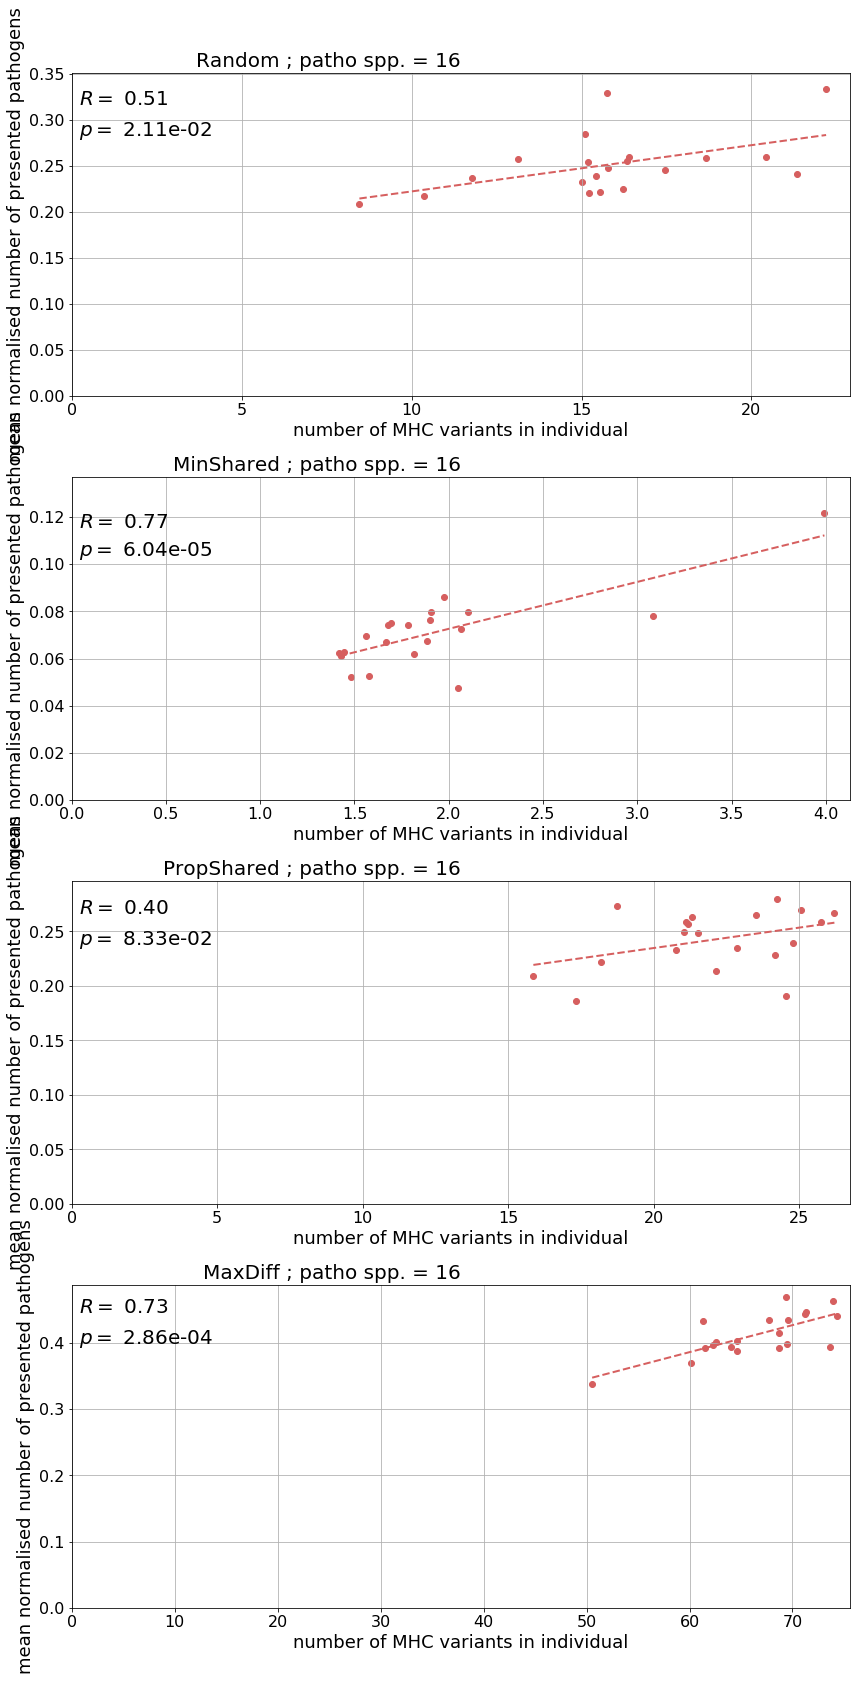

In [58]:
#scenario = np.unique(df_1['SEXSELECT'])
scenario = ['Random', 'MinShared', 'PropShared', 'MaxDiff']
plt.figure(figsize=(12,24))
for ii, itm in enumerate(scenario):
    plt.subplot(len(scenario),1,ii+1)
    subArr = df_1[(df_1['SEXSELECT'] == itm) & (df_1['patho_spp'] == float(spp))]
    plotINVvsPresPatho(subArr, spp, itm, ii+1)
plt.tight_layout()
plt.subplots_adjust(hspace=0.25, wspace=0.2)
plt.savefig("INV_vs_Patho_1e5_" + str(spp) + "_.png")

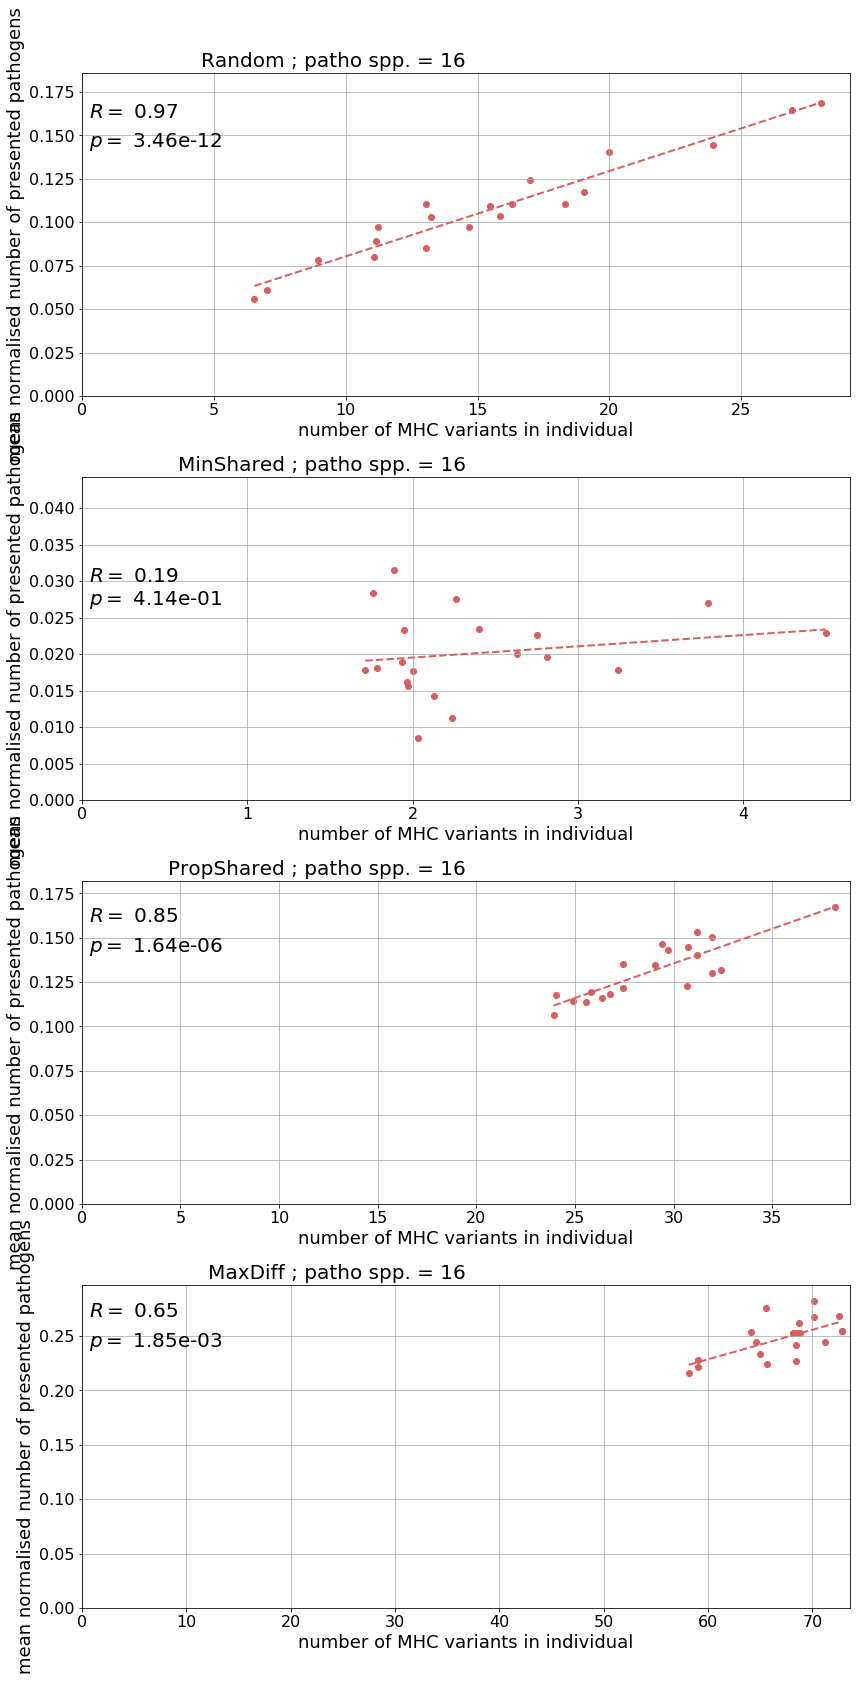

In [59]:
#scenario = np.unique(df_1['SEXSELECT'])
scenario = ['Random', 'MinShared', 'PropShared', 'MaxDiff']
plt.figure(figsize=(12,24))
for ii, itm in enumerate(scenario):
    plt.subplot(len(scenario),1,ii+1)
    subArr = df_5[(df_5['SEXSELECT'] == itm) & (df_5['patho_spp'] == float(spp))]
    plotINVvsPresPatho(subArr, spp, itm, ii+1)
plt.tight_layout()
plt.subplots_adjust(hspace=0.25, wspace=0.2)
plt.savefig("INV_vs_Patho_5e5_" + str(spp) + "_.png")